In [55]:
import pandas as pd # data frame from Library
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [56]:
df = pd.read_csv('heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Scalling the data

In [61]:
scaler = MinMaxScaler()

In [62]:
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

In [ ]:
# Applying SVM without tuning the hyperparameter

In [64]:
svcClassifier = SVC(kernel='linear')
SVC_model = svcClassifier.fit(xtrain_scaled, ytrain)

print("Train_Score :", SVC_model.score(xtrain_scaled, ytrain))
print("Test_Score  :", SVC_model.score(xtest_scaled, ytest))

Train_Score : 0.8660287081339713
Test_Score  : 0.7333333333333333


In [67]:
# Default Parameters
print(SVC_model)

SVC(kernel='linear')


In [68]:
# HyperParameter Tuning of SVM model using gsCV
# GridSearchCV is used for determing the best parameters of the model

In [71]:
params = {
    'C'    : [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}


grid_search = GridSearchCV(SVC(random_state=0), params, cv=5, n_jobs=-1)
grid_search.fit(xtrain_scaled, ytrain)


print("Train_Score :" + str(grid_search.score(xtrain_scaled, ytrain)))
print("Test_Score :" + str(grid_search.score(xtest_scaled, ytest)))

Train_Score :0.861244019138756
Test_Score :0.7222222222222222


In [ ]:
# Checking best parameters model

In [72]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [74]:
grid_search.cv_results_

{'mean_fit_time': array([0.00698957, 0.00411816, 0.00205841, 0.00163188, 0.0012538 ,
        0.00132227, 0.00177898, 0.00146394, 0.00126262, 0.00126443,
        0.00167198, 0.00153303, 0.00122223, 0.00134478, 0.00199599,
        0.0021183 , 0.00116568, 0.00151525, 0.00156236, 0.00221395,
        0.00210109, 0.00202451, 0.00167875, 0.00116506, 0.00159826,
        0.00163403, 0.00154276, 0.00133967, 0.00135689, 0.00113111,
        0.00158057, 0.00126114, 0.00114861, 0.0021708 , 0.00157661,
        0.00154123, 0.00110016, 0.00122008, 0.00170283, 0.00186563,
        0.00315938, 0.00198112, 0.00220304, 0.00167632, 0.0013886 ,
        0.00236001, 0.00272503, 0.00281682, 0.00228791, 0.00193863,
        0.00242615, 0.00211606, 0.00112472, 0.00113029, 0.00152311,
        0.00243192, 0.00111756, 0.00344176, 0.00166144, 0.00245519,
        0.00283408, 0.001647  , 0.00228176, 0.00272527, 0.002458  ,
        0.0022696 , 0.00300889, 0.00167575, 0.00325246, 0.00261893,
        0.00241323, 0.00227613,

In [ ]:
# previous class work; Please skip the following the codes!

In [6]:
# to save or download the current csv file

In [7]:
df.to_csv('new.csv')

In [8]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

In [9]:
x = df.drop('death', axis=1)
y = df['death']

In [10]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, train_size=0.70, random_state=42)

In [11]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [12]:
ytest.shape

(90,)

In [13]:
xtest.shape

(90, 12)

<AxesSubplot:xlabel='death', ylabel='count'>

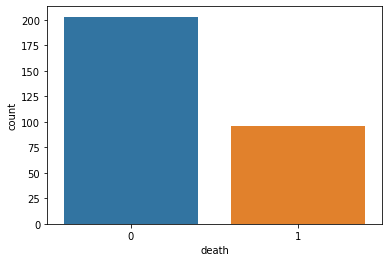

In [14]:
sns.countplot(x='death', data=df)

In [15]:
# Decison Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [16]:
dt.fit(xtrain, ytrain) # train the model with 70% dataset

DecisionTreeClassifier()

In [17]:
pred = dt.predict(xtest) # predict in corresponding to ytest
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [18]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [19]:
np.array(ytest)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0])

In [20]:
dt.score(xtest, ytest)

0.6777777777777778

In [21]:
# Evalaute ML Model

In [22]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [23]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        53
           1       0.64      0.49      0.55        37

    accuracy                           0.68        90
   macro avg       0.67      0.65      0.65        90
weighted avg       0.67      0.68      0.67        90



In [24]:
test_confusion_matrix = confusion_matrix(ytest, pred)
test_confusion_matrix

array([[43, 10],
       [19, 18]])

<AxesSubplot:>

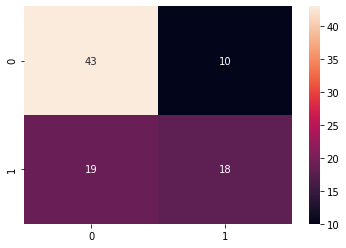

In [25]:
sns.heatmap(test_confusion_matrix, annot=True)

In [26]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [27]:
dt.score(xtest,ytest)

0.6777777777777778

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier() # default parameter

In [48]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [49]:
rfc.score(xtest, ytest)

0.7777777777777778

# Hyper Parameter Tuning

In [51]:
trees = np.random.randint(20,150,25)
trees

array([148, 138,  61,  87, 143,  39, 131, 115,  46, 145, 104, 127,  76,
        87,  43, 126,  23,  44,  34,  58,  83, 118,  57,  20,  60])

In [52]:
criterion = ['gini', 'entropy', 'log_loss']
max_depth = np.random.randint(1, 20, 30)
min_samples_split = [2,3,4]
max_features = ['sqrt', 'log2']

In [53]:
# hyperparameters
parameter = {
   # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      #   'C': [1, 5, 10, 20],
   'n_estimator': trees,
  # 'criterion': criterion,
   'max_depth': max_depth,
   #'max_feature': max_features
}

In [43]:
print(parameter)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20], 'n_estimator': array([ 77, 144,  58,  85,  92,  36,  30, 102, 101,  65,  87, 100,  91,
        98,  71, 117, 119,  76, 144, 122,  97,  89,  56,  73, 100]), 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': array([ 2,  6, 14,  5, 12, 19,  1,  8,  3,  2,  8,  2,  3,  3,  4, 19, 16,
        6, 16,  7, 17,  6, 19,  4, 11, 10,  4,  6,  5,  7]), 'max_feature': ['sqrt', 'log2']}
